### Training and Visualizing Decision Tree


In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

iris = load_iris(as_frame=True)
X = iris.data[['petal length (cm)', 'petal width (cm)']].values
y = iris.target

In [6]:
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [8]:
export_graphviz(
    tree_clf,
    out_file='tree.dot',
    feature_names=['petal length (cm)', 'petal width (cm)'],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

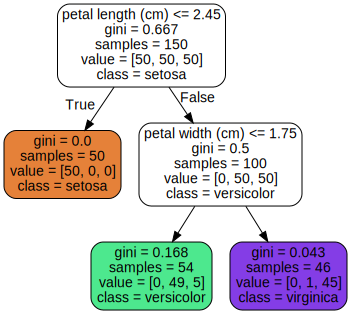

In [9]:
from graphviz import Source

Source.from_file('tree.dot')

let's do over fitting


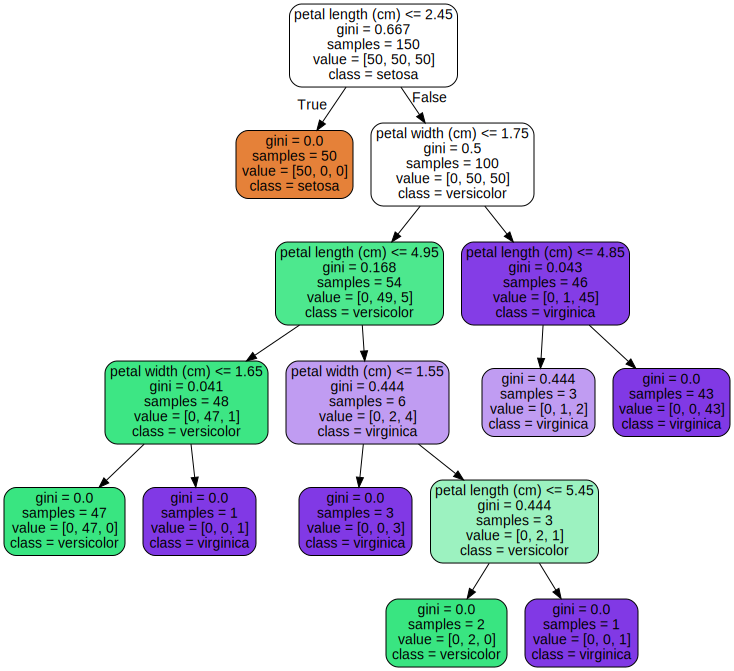

In [10]:
tree_clf2 = DecisionTreeClassifier(max_depth=None, random_state=32)
tree_clf2.fit(X, y)

export_graphviz(
    tree_clf2,
    out_file='treePure.dot',
    feature_names=['petal length (cm)', 'petal width (cm)'],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

Source.from_file('treePure.dot')

In [11]:
help(tree_clf.tree_)

Help on Tree object:

class Tree(builtins.object)
 |  Array-based representation of a binary decision tree.
 |  
 |  The binary tree is represented as a number of parallel arrays. The i-th
 |  element of each array holds information about the node `i`. Node 0 is the
 |  tree's root. You can find a detailed description of all arrays in
 |  `_tree.pxd`. NOTE: Some of the arrays only apply to either leaves or split
 |  nodes, resp. In this case the values of nodes of the other type are
 |  arbitrary!
 |  
 |  Attributes
 |  ----------
 |  node_count : int
 |      The number of nodes (internal nodes + leaves) in the tree.
 |  
 |  capacity : int
 |      The current capacity (i.e., size) of the arrays, which is at least as
 |      great as `node_count`.
 |  
 |  max_depth : int
 |      The depth of the tree, i.e. the maximum depth of its leaves.
 |  
 |  children_left : array of int, shape [node_count]
 |      children_left[i] holds the node id of the left child of node i.
 |      For leave

In [12]:
tree_clf.tree_

In [14]:
tree_clf.predict_proba([[5, 1.5]]).round(3)

array([[0.   , 0.907, 0.093]])

In [15]:
tree_clf2.predict_proba([[5, 1.5]]).round(3)

array([[0., 0., 1.]])

In [19]:
tree_clf.tree_.threshold

array([ 2.44999999, -2.        ,  1.75      , -2.        , -2.        ])

In [22]:
tree_clf2.tree_.threshold

array([ 2.44999999, -2.        ,  1.75      ,  4.95000005,  1.65000004,
       -2.        , -2.        ,  1.55000001, -2.        ,  5.45000005,
       -2.        , -2.        ,  4.85000014, -2.        , -2.        ])

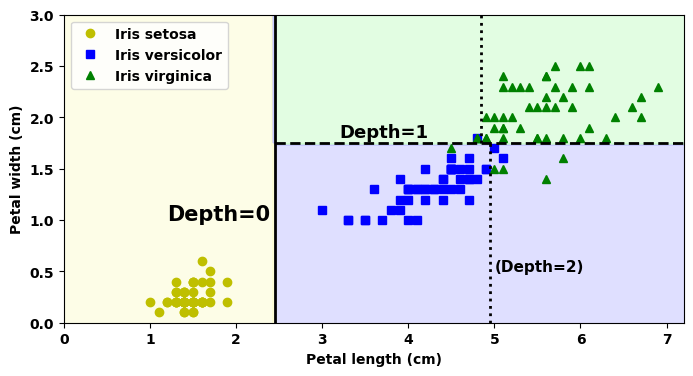

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# extra code – just formatting details
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0', '#9898ff', '#a0faa0'])
plt.figure(figsize=(8, 4))

lengths, widths = np.meshgrid(np.linspace(0, 7.2, 100), np.linspace(0, 3, 100))
X_all = np.c_[lengths.ravel(), widths.ravel()]
y_pred = tree_clf.predict(X_all).reshape(lengths.shape)
plt.contourf(lengths, widths, y_pred, alpha=0.3, cmap=custom_cmap)
for idx, (name, style) in enumerate(zip(iris.target_names, ("yo", "bs", "g^"))):
    plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
             style, label=f"Iris {name}")

# extra code – this section beautifies and saves Figure 6–2
tree_clf_deeper = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf_deeper.fit(X, y)
th0, th1, th2a, th2b = tree_clf_deeper.tree_.threshold[[0, 2, 3, 6]]
plt.xlabel("Petal length (cm)")
plt.ylabel("Petal width (cm)")
plt.plot([th0, th0], [0, 3], "k-", linewidth=2)
plt.plot([th0, 7.2], [th1, th1], "k--", linewidth=2)
plt.plot([th2a, th2a], [0, th1], "k:", linewidth=2)
plt.plot([th2b, th2b], [th1, 3], "k:", linewidth=2)
plt.text(th0 - 0.05, 1.0, "Depth=0", horizontalalignment="right", fontsize=15)
plt.text(3.2, th1 + 0.02, "Depth=1", verticalalignment="bottom", fontsize=13)
plt.text(th2a + 0.05, 0.5, "(Depth=2)", fontsize=11)
plt.axis([0, 7.2, 0, 3])
plt.legend()

plt.show()